In [1]:
import numpy as np
from scipy.interpolate import interp1d
from simpegEM1D import EM1DAnalytics
from simpegEM1D.Waveforms import (
    piecewise_ramp, piecewise_pulse, piecewise_pulse_fast,
    piecewise_ramp_fast, piecewise_ramp_fast_diff
    
)
from scipy.integrate import fixed_quad
from scipy.integrate.quadrature import _cached_roots_legendre
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def v_step(time):
    return EM1DAnalytics.dBzdtAnalCircT(
    10., time, 1e-1
    )

In [3]:
t_currents = np.r_[0., 0.002, 0.004]
T = t_currents.max()
currents = np.r_[0., 1., 0.]

In [4]:
def v_step_e(t):
    return 1./t
def v_ramp_off_e(t, t0):
    return 1./t0 * np.log((t+t0)/t)

def v_step_l(t):
    return t**(-5./2)
def v_ramp_off_l(t, t0):
    F_t_t0 = 2*t * (1-(1+t0/t)**-1.5) / (3*t0)
    return t**(-5./2) * F_t_t0
def v_step(time):
    return EM1DAnalytics.dBzdtAnalCircT(
    10., time, 1e-1
    )

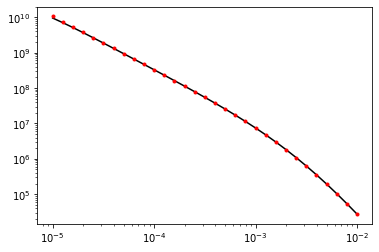

In [5]:
# single pulse
t_off = np.logspace(-5, -2, 31)
response_single = piecewise_ramp(v_step_l, t_off, t_currents, currents)
response_single_true = v_ramp_off_l(t_off, 2e-3)-v_ramp_off_l(t_off+0.002, 2e-3)
# double pulse
plt.loglog(t_off, response_single, 'k')
plt.loglog(t_off, response_single_true, 'r.')

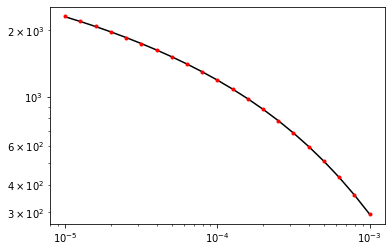

In [6]:
# single pulse
t_off = np.logspace(-5, -3, 21)
response_single = piecewise_ramp(v_step_e, t_off, t_currents, currents)
response_single_true = v_ramp_off_e(t_off, 2e-3)-v_ramp_off_e(t_off+0.002, 2e-3)
# double pulse
plt.loglog(t_off, response_single, 'k')
plt.loglog(t_off, response_single_true, 'r.')

In [7]:
def v_step_exp(t, tau=5e-3):
    return 1./tau * np.exp(-t/tau)
def v_ramp_off_exp(t, t0, tau=5e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + np.exp(-(t)/tau))
def v_ramp_off_exp_on(t, t0, tau=5e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + 1.)

In [8]:
time = np.logspace(-6, -3, 31) - 1e-5

In [9]:
response_single = piecewise_ramp(v_step_exp, time, t_currents, currents)
response_single_true_off = (
    v_ramp_off_exp(time[time>=0.], 2e-3)-
    v_ramp_off_exp(time[time>=0.]+0.002, 2e-3)
)
response_single_true_on = (
    v_ramp_off_exp_on(time[time<0.], 2e-3)-
    v_ramp_off_exp(time[time<0.]+0.002, 2e-3)
)


0.001991
0.001991258925411794
0.001991584893192461
0.001991995262314969
0.0019925118864315096
0.0019931622776601684
0.001993981071705535
0.0019950118723362728
0.001996309573444802
0.0019979432823472427


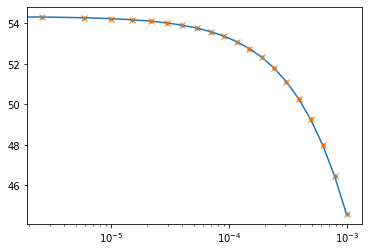

In [10]:
plt.plot(time, response_single, '.-')
plt.plot(time, np.r_[response_single_true_on, response_single_true_off], 'x')
plt.xscale('log')


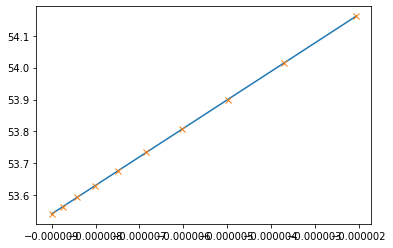

In [11]:
plt.plot(time[time<0.], response_single_true_on)
plt.plot(time[time<0.], response_single[time<0.], 'x')

In [12]:
t_currents = np.r_[0., 0.002, 0.003,  0.004]
T = t_currents.max()
currents = np.r_[0., 1., 0.5, 0.]

In [13]:
x, w = _cached_roots_legendre(5)
response_single= piecewise_ramp_fast(
    v_step_exp, time, t_currents, currents, x, w
)

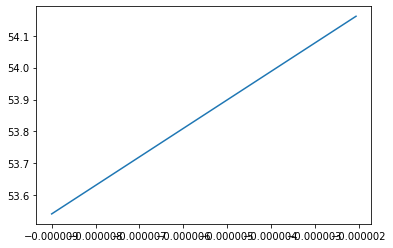

In [14]:
plt.plot(time[time<0.], response_single_true_on)
plt.plot(time[time<0.], response_single[time<0.], 'x')

In [15]:
response_single[time<0.]

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

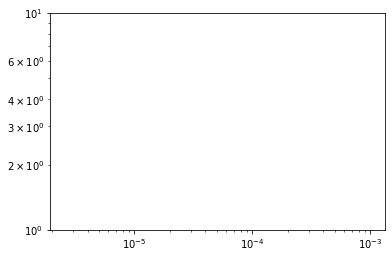

In [16]:
plt.loglog(time[time>=0.], response_single_true_off)
plt.loglog(time[time>=0.], response_single[time>=0.], 'x')

In [17]:
T = 1./25.
response_single = piecewise_pulse(
    v_step_exp, time, t_currents, currents, T, n_pulse=2
)
response_single_1 = piecewise_pulse_fast(
    v_step_exp, time, t_currents, currents, T, n_pulse=2
)

0.0009910000000000001
0.0009912589254117941
0.0009915848931924612
0.0009919952623149689
0.0009925118864315095
0.0009931622776601684
0.000993981071705535
0.0009950118723362727
0.000996309573444802
0.0009979432823472429


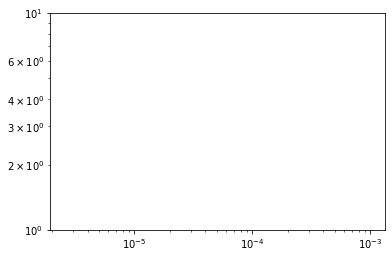

In [18]:
plt.loglog(time[time>=0.], response_single[time>=0.])
plt.loglog(time[time>=0.], response_single_1[time>=0.], 'x')

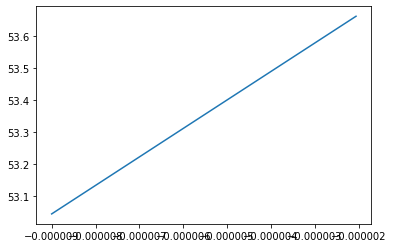

In [19]:
plt.plot(time[time<0.], response_single[time<0.])
plt.plot(time[time<0.], response_single_1[time<0.], 'x')

In [33]:
time = np.logspace(-6, -3, 31) - ramp

In [34]:
ramp = 1e-5
t_currents = np.r_[0., 0.002, 0.002+ramp]
T = t_currents.max()
currents = np.r_[0., 1., 0.]

(0.002, 0.00201)

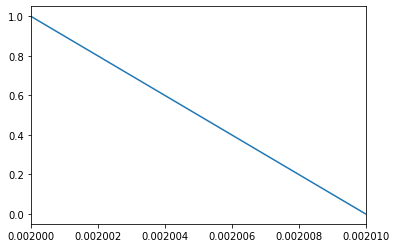

In [35]:
plt.plot(t_currents, currents)
plt.xlim(0.002, 0.002+1e-5)

In [36]:
response_single_em = piecewise_pulse(
    v_step, time, t_currents, currents, T, n_pulse=2, n=3
)
response_single_em_test = piecewise_pulse_fast(
    v_step, time, t_currents, currents, T, n_pulse=2, n=20
)

1.000000000000026e-06
1.2589254117941924e-06
1.5848931924611389e-06
1.9952623149689037e-06
2.5118864315096073e-06
3.1622776601684046e-06
3.9810717055349945e-06
5.01187233627275e-06
6.309573444801955e-06
7.943282347242847e-06


In [37]:
response_single_em

array([-2.78398399e-03, -3.28819615e-03, -3.77660354e-03, -4.22113060e-03,
       -4.61929714e-03, -4.99715220e-03, -5.38829191e-03, -5.79489179e-03,
       -6.16026882e-03, -6.38393971e-03, -6.37300371e-03, -1.32768886e-03,
       -4.41352114e-04, -1.83054594e-04, -8.46684095e-05, -4.16450353e-05,
       -2.12761909e-05, -1.11429240e-05, -5.93413231e-06, -3.19603570e-06,
       -1.73405780e-06, -9.44935501e-07, -5.15887505e-07, -2.81580365e-07,
       -1.53363587e-07, -8.32044011e-08, -4.48866481e-08, -2.40353531e-08,
       -1.27501022e-08, -6.68707454e-09, -3.46065512e-09])

In [38]:
response_single_em_test

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [39]:
v_step(-3.5575383784680614e-20)

nan

In [40]:
v_step

<function __main__.v_step(time)>

In [41]:
currents

array([0., 1., 0.])

In [42]:
t_currents

array([0.     , 0.002  , 0.00201])

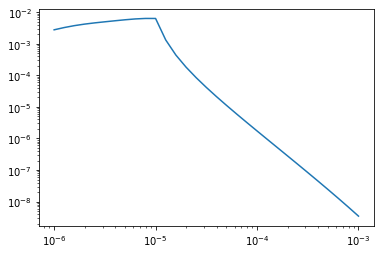

In [43]:
plt.loglog(time+ramp, -response_single_em, '-')
plt.loglog(time+ramp, -response_single_em_test, '.')

# TODO: this is not done yet.. there are quite a few things missing!